In [1]:
import cv2
import numpy as np
import glob
import os
def readVideo(filename):
    cap=cv2.VideoCapture(filename)

    videoinfo={
        'frames':int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        'codec':hex(int(cap.get(cv2.CAP_PROP_FOURCC))),
        'rate':cap.get(cv2.CAP_PROP_FPS),
        'width':int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        'height':int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
        'format':cap.get(cv2.CAP_PROP_FORMAT)
    }
    return cap,videoinfo

def videoWriter(output,videoformat='XVID',scale=(480,640),fps=30):
    codec=cv2.VideoWriter_fourcc(*videoformat)
    vid_writer = cv2.VideoWriter(output,codec,fps,scale)
    return vid_writer

In [2]:
videopath='data/bolt2video/*.jpg'
labelpath='data/bolt2'
writer=videoWriter('my.avi',scale=(480,270),fps=30)

In [3]:
def readLabel():
    path=os.path.join(labelpath,'groundtruth.txt')
    ret=[]
    with open(path) as fs:
        for line in fs:
            sps=line.strip().split(',')

            x= np.array([float(x) for x in sps]).reshape(-1,2).astype(np.int)
        
            ret.append(x)
    return ret

def readImage():
    flist=glob.glob(videopath)
    flist=sorted(flist)
    labels=readLabel()
    for f,gt in zip(flist,labels):
        I=cv2.imread(f)
        cv2.polylines(I,[gt],True,(0,0,255),10)
        writer.write(I)
    writer.release()


In [4]:
readImage()

In [5]:
# readImage()

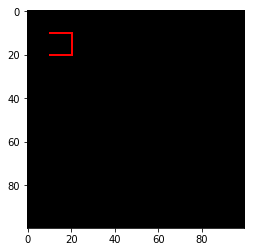

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
A=np.zeros((100,100,3)).astype(np.uint8)
# A=cv2.rectangle(A,(30,30),(40,40),(255,0,0))
cv2.polylines(A,[np.array([[10,10],[20,10],[20,20],[10,20]])],False,(255,0,0))
plt.imshow(A)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.imshow(A)

In [ ]:
img = np.zeros((800, 1000, 3), np.uint8)
# points = np.array([[910, 650], [206, 650], [458, 500], [696, 500]])
points=np.array([[10,10],[100,10],[100,100],[10,100]])
cv2.polylines(img, [points], True, (255, 0, 255),2)

plt.imshow(img)
plt.show()

In [ ]:
a=readLabel()[2]

img = np.zeros((800, 1000, 3), np.uint8)
# points = np.array([[910, 650], [206, 650], [458, 500], [696, 500]])
points=np.array([[10,10],[100,10],[100,100],[10,100]])
cv2.polylines(img, [a], True, (255, 0, 0),10)

plt.imshow(img)
plt.show()

In [ ]:
len(a)